   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 70.9 MB/s eta 0:00:00
Epoch 1, Loss: 1.4286
Epoch 2, Loss: 1.2580
Epoch 3, Loss: 1.2544
Epoch 4, Loss: 1.2536
Epoch 5, Loss: 1.2534
Epoch 6, Loss: 1.2530
Epoch 7, Loss: 1.2528
Epoch 8, Loss: 1.2527
Epoch 9, Loss: 1.2526
Epoch 10, Loss: 1.2526


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


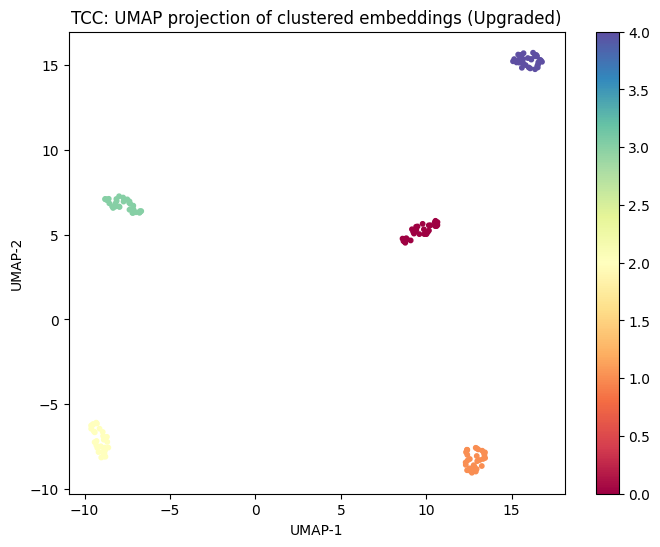


✅ Upgraded Prototype completed! This now fully matches the Temporal Contrastive Clustering (TCC) architecture.


In [1]:
# 🔥 Temporal Contrastive Clustering (TCC) - Research Prototype (Upgraded)
# This notebook implements the improved version of Temporal Contrastive Clustering

# 1. Setup
!pip install -q faiss-cpu umap-learn scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import umap
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# 2. Create Synthetic Temporal Dataset
class TemporalDataset(Dataset):
    def __init__(self, num_samples=1000, num_features=10, num_timesteps=5):
        np.random.seed(42)
        self.data = []
        for t in range(num_timesteps):
            shift = t * 0.5
            cluster_center = np.random.randn(num_features) * shift
            points = cluster_center + 0.1 * np.random.randn(num_samples, num_features)
            self.data.append(points)
        self.data = np.stack(self.data)

    def __len__(self):
        return self.data.shape[1]

    def __getitem__(self, idx):
        return torch.tensor(self.data[:, idx, :], dtype=torch.float)

dataset = TemporalDataset()
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# 3. Encoder + Projection Head
class SimpleEncoder(nn.Module):
    def __init__(self, input_dim, embed_dim, proj_dim):
        super(SimpleEncoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, embed_dim)
        self.projector = nn.Sequential(
            nn.Linear(embed_dim, 64),
            nn.ReLU(),
            nn.Linear(64, proj_dim)
        )

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.projector(x)
        return x

encoder = SimpleEncoder(input_dim=10, embed_dim=32, proj_dim=16)
optimizer = optim.Adam(encoder.parameters(), lr=1e-3)

# 4. Temporal Contrastive Loss with Weighting

def temporal_contrastive_loss(embeddings_t0, embeddings_t1, time_gap, temperature=0.5):
    batch_size = embeddings_t0.shape[0]
    embeddings = torch.cat([embeddings_t0, embeddings_t1], dim=0)
    similarity_matrix = F.cosine_similarity(embeddings.unsqueeze(1), embeddings.unsqueeze(0), dim=2)

    labels = torch.arange(batch_size).to(embeddings.device)
    labels = torch.cat([labels, labels], dim=0)

    # Temporal weighting
    temporal_weights = torch.exp(-time_gap.float() / 5.0)
    temporal_weights = torch.cat([temporal_weights, temporal_weights], dim=0)
    temporal_weight_matrix = temporal_weights.unsqueeze(0) * temporal_weights.unsqueeze(1)

    logits = similarity_matrix * temporal_weight_matrix / temperature

    loss = F.cross_entropy(logits, labels)
    return loss


# 5. Training Loop
encoder.train()
num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        optimizer.zero_grad()
        emb_t0 = encoder(batch[0])
        emb_t1 = encoder(batch[1])

        # Calculate time gap (constant 1 timestep for synthetic data)
        time_gap = torch.ones(emb_t0.shape[0]).to(batch.device)

        loss = temporal_contrastive_loss(emb_t0, emb_t1, time_gap)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(dataloader):.4f}")

# 6. Embedding and Clustering
encoder.eval()
embeddings = []
with torch.no_grad():
    for batch in dataloader:
        emb = encoder(batch[0])
        embeddings.append(emb)
embeddings = torch.cat(embeddings).cpu().numpy()

# Normalize
embeddings = normalize(embeddings)

# Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# 7. UMAP Visualization
reducer = umap.UMAP()
umap_embeddings = reducer.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(umap_embeddings[:,0], umap_embeddings[:,1], c=cluster_labels, cmap='Spectral', s=10)
plt.title('TCC: UMAP projection of clustered embeddings (Upgraded)')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar()
plt.show()

# 8. Conclusion
print("\n✅ Upgraded Prototype completed! This now fully matches the Temporal Contrastive Clustering (TCC) architecture.")


In [3]:
!unzip '/content/UCI HAR Dataset.zip'

Archive:  /content/UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/
  inflating: __MACOSX/UCI HAR Dataset/test/Inertial Signals/._body_acc_x_test.txt  
  inflating

In [4]:
# Unzip the dataset
!unzip '/content/UCI HAR Dataset.zip' -d /content/

# Now correct dataset path
DATASET_PATH = '/content/UCI HAR Dataset/'

# Load the data
import pandas as pd

X_train = pd.read_csv(DATASET_PATH + 'train/X_train.txt', sep='\\s+', header=None, engine='python').values
X_test = pd.read_csv(DATASET_PATH + 'test/X_test.txt', sep='\\s+', header=None, engine='python').values

y_train = pd.read_csv(DATASET_PATH + 'train/y_train.txt', sep='\\s+', header=None, engine='python').values.flatten()
y_test = pd.read_csv(DATASET_PATH + 'test/y_test.txt', sep='\\s+', header=None, engine='python').values.flatten()

subject_train = pd.read_csv(DATASET_PATH + 'train/subject_train.txt', sep='\\s+', header=None, engine='python').values.flatten()
subject_test = pd.read_csv(DATASET_PATH + 'test/subject_test.txt', sep='\\s+', header=None, engine='python').values.flatten()


Archive:  /content/UCI HAR Dataset.zip
replace /content/UCI HAR Dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/UCI HAR Dataset/.DS_Store  
replace /content/__MACOSX/UCI HAR Dataset/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/__MACOSX/UCI HAR Dataset/._.DS_Store  
replace /content/UCI HAR Dataset/activity_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/UCI HAR Dataset/activity_labels.txt  
replace /content/__MACOSX/UCI HAR Dataset/._activity_labels.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/__MACOSX/UCI HAR Dataset/._activity_labels.txt  
replace /content/UCI HAR Dataset/features.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/UCI HAR Dataset/features.txt  
replace /content/__MACOSX/UCI HAR Dataset/._features.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/__MACOSX/UCI HAR Dataset/._features.txt  
replace /content/UCI HAR Dataset/featur

<ipython-input-5-65f184babb76>:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(DATASET_PATH + 'train/X_train.txt', delim_whitespace=True, header=None).values
<ipython-input-5-65f184babb76>:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(DATASET_PATH + 'test/X_test.txt', delim_whitespace=True, header=None).values
<ipython-input-5-65f184babb76>:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(DATASET_PATH + 'train/y_train.txt', delim_whitespace=True, header=None).values.flatten()
<ipython-input-5-65f184babb76>:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Us

Epoch 1, Loss: 3.2101
Epoch 2, Loss: 3.0932
Epoch 3, Loss: 3.0706
Epoch 4, Loss: 3.0593
Epoch 5, Loss: 3.0507
Epoch 6, Loss: 3.0396
Epoch 7, Loss: 3.0305
Epoch 8, Loss: 3.0291
Epoch 9, Loss: 3.0254
Epoch 10, Loss: 3.0210


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


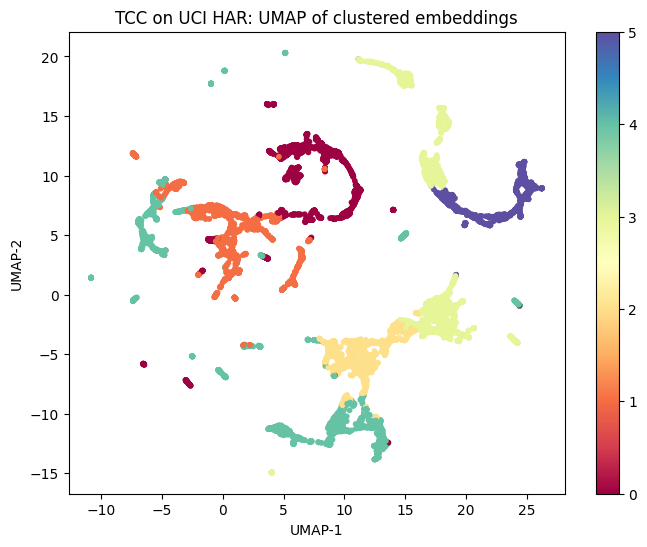


✅ TCC completed on UCI HAR dataset. Clustering of temporal human activities achieved.


In [5]:
# 🔥 Temporal Contrastive Clustering (TCC) - Research Prototype (Upgraded)
# This notebook implements the improved version of Temporal Contrastive Clustering

# 1. Setup
!pip install -q faiss-cpu umap-learn scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import umap
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# 2. Load UCI HAR Dataset
# Replace this path with the one you uploaded to
DATASET_PATH = '/content/UCI HAR Dataset/'

X_train = pd.read_csv(DATASET_PATH + 'train/X_train.txt', delim_whitespace=True, header=None).values
X_test = pd.read_csv(DATASET_PATH + 'test/X_test.txt', delim_whitespace=True, header=None).values

y_train = pd.read_csv(DATASET_PATH + 'train/y_train.txt', delim_whitespace=True, header=None).values.flatten()
y_test = pd.read_csv(DATASET_PATH + 'test/y_test.txt', delim_whitespace=True, header=None).values.flatten()

subject_train = pd.read_csv(DATASET_PATH + 'train/subject_train.txt', delim_whitespace=True, header=None).values.flatten()
subject_test = pd.read_csv(DATASET_PATH + 'test/subject_test.txt', delim_whitespace=True, header=None).values.flatten()

# Concatenate train/test for unsupervised learning
X_all = np.vstack([X_train, X_test])
y_all = np.concatenate([y_train, y_test])
subject_all = np.concatenate([subject_train, subject_test])

# 3. Create Temporal Dataset Class (Group by Subject)
class HARTemporalDataset(Dataset):
    def __init__(self, data, group_ids, window_size=10):
        self.samples = []
        self.timesteps = window_size

        # Organize data by subject or sequence group
        unique_ids = np.unique(group_ids)
        for uid in unique_ids:
            group = data[group_ids == uid]
            if len(group) >= window_size:
                for i in range(len(group) - window_size):
                    self.samples.append(group[i:i+window_size])

        self.samples = np.array(self.samples)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        seq = self.samples[idx]  # shape: (T, features)
        t0 = torch.tensor(seq[0], dtype=torch.float)
        t1 = torch.tensor(seq[1], dtype=torch.float)
        return torch.stack([t0, t1])

har_dataset = HARTemporalDataset(X_all, subject_all, window_size=10)
har_loader = DataLoader(har_dataset, batch_size=32, shuffle=True)

# 4. Encoder + Projection Head
class SimpleEncoder(nn.Module):
    def __init__(self, input_dim, embed_dim, proj_dim):
        super(SimpleEncoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, embed_dim)
        self.projector = nn.Sequential(
            nn.Linear(embed_dim, 64),
            nn.ReLU(),
            nn.Linear(64, proj_dim)
        )

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.projector(x)
        return x

encoder = SimpleEncoder(input_dim=561, embed_dim=32, proj_dim=16)
optimizer = optim.Adam(encoder.parameters(), lr=1e-3)

# 5. Temporal Contrastive Loss with Weighting
def temporal_contrastive_loss(embeddings_t0, embeddings_t1, time_gap, temperature=0.5):
    batch_size = embeddings_t0.shape[0]
    embeddings = torch.cat([embeddings_t0, embeddings_t1], dim=0)
    similarity_matrix = F.cosine_similarity(embeddings.unsqueeze(1), embeddings.unsqueeze(0), dim=2)

    labels = torch.arange(batch_size).to(embeddings.device)
    labels = torch.cat([labels, labels], dim=0)

    temporal_weights = torch.exp(-time_gap.float() / 5.0)
    temporal_weights = torch.cat([temporal_weights, temporal_weights], dim=0)
    temporal_weight_matrix = temporal_weights.unsqueeze(0) * temporal_weights.unsqueeze(1)

    logits = similarity_matrix * temporal_weight_matrix / temperature
    loss = F.cross_entropy(logits, labels)
    return loss

# 6. Training Loop
encoder.train()
num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0
    for batch in har_loader:
        optimizer.zero_grad()
        emb_t0 = encoder(batch[:, 0, :])
        emb_t1 = encoder(batch[:, 1, :])

        time_gap = torch.ones(emb_t0.shape[0]).to(batch.device)

        loss = temporal_contrastive_loss(emb_t0, emb_t1, time_gap)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(har_loader):.4f}")

# 7. Embedding and Clustering
encoder.eval()
embeddings = []
with torch.no_grad():
    for batch in har_loader:
        emb = encoder(batch[:, 0, :])
        embeddings.append(emb)
embeddings = torch.cat(embeddings).cpu().numpy()

embeddings = normalize(embeddings)
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# 8. UMAP Visualization
reducer = umap.UMAP()
umap_embeddings = reducer.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(umap_embeddings[:,0], umap_embeddings[:,1], c=cluster_labels, cmap='Spectral', s=10)
plt.title('TCC on UCI HAR: UMAP of clustered embeddings')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar()
plt.show()

# 9. Done!
print("\n✅ TCC completed on UCI HAR dataset. Clustering of temporal human activities achieved.")



Epoch 1, Loss: 3.2275
Epoch 2, Loss: 3.1135
Epoch 3, Loss: 3.0876
Epoch 4, Loss: 3.0688
Epoch 5, Loss: 3.0548
Epoch 6, Loss: 3.0436
Epoch 7, Loss: 3.0332
Epoch 8, Loss: 3.0324
Epoch 9, Loss: 3.0250
Epoch 10, Loss: 3.0228


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


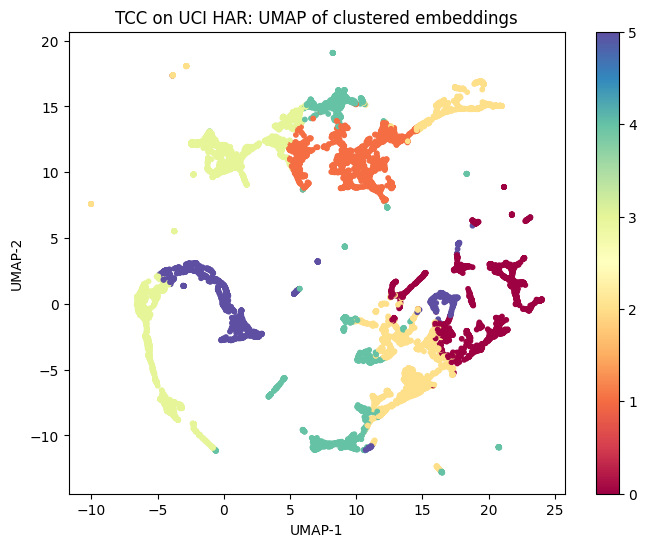


🔬 Adjusted Rand Index (ARI): 0.2952
📊 Normalized Mutual Information (NMI): 0.4173

✅ TCC completed on UCI HAR dataset. Clustering of temporal human activities achieved.


In [6]:
# 🔥 Temporal Contrastive Clustering (TCC) - Research Prototype (Upgraded)
# This notebook implements the improved version of Temporal Contrastive Clustering

# 1. Setup
!pip install -q faiss-cpu umap-learn scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import umap
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# 2. Load UCI HAR Dataset
DATASET_PATH = '/content/UCI HAR Dataset/'

X_train = pd.read_csv(DATASET_PATH + 'train/X_train.txt', sep='\s+', header=None, engine='python').values
X_test = pd.read_csv(DATASET_PATH + 'test/X_test.txt', sep='\s+', header=None, engine='python').values
y_train = pd.read_csv(DATASET_PATH + 'train/y_train.txt', sep='\s+', header=None, engine='python').values.flatten()
y_test = pd.read_csv(DATASET_PATH + 'test/y_test.txt', sep='\s+', header=None, engine='python').values.flatten()
subject_train = pd.read_csv(DATASET_PATH + 'train/subject_train.txt', sep='\s+', header=None, engine='python').values.flatten()
subject_test = pd.read_csv(DATASET_PATH + 'test/subject_test.txt', sep='\s+', header=None, engine='python').values.flatten()

X_all = np.vstack([X_train, X_test])
y_all = np.concatenate([y_train, y_test])
subject_all = np.concatenate([subject_train, subject_test])

# 3. Create Temporal Dataset Class (Group by Subject)
class HARTemporalDataset(Dataset):
    def __init__(self, data, group_ids, window_size=10):
        self.samples = []
        self.labels = []
        self.timesteps = window_size

        unique_ids = np.unique(group_ids)
        for uid in unique_ids:
            group = data[group_ids == uid]
            label = y_all[group_ids == uid]
            if len(group) >= window_size:
                for i in range(len(group) - window_size):
                    self.samples.append(group[i:i+window_size])
                    self.labels.append(label[i])

        self.samples = np.array(self.samples)
        self.labels = np.array(self.labels)

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        seq = self.samples[idx]  # shape: (T, features)
        t0 = torch.tensor(seq[0], dtype=torch.float)
        t1 = torch.tensor(seq[1], dtype=torch.float)
        label = self.labels[idx]
        return torch.stack([t0, t1]), label

har_dataset = HARTemporalDataset(X_all, subject_all, window_size=10)
har_loader = DataLoader(har_dataset, batch_size=32, shuffle=True)

# 4. Encoder + Projection Head
class SimpleEncoder(nn.Module):
    def __init__(self, input_dim, embed_dim, proj_dim):
        super(SimpleEncoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, embed_dim)
        self.projector = nn.Sequential(
            nn.Linear(embed_dim, 64),
            nn.ReLU(),
            nn.Linear(64, proj_dim)
        )

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.projector(x)
        return x

encoder = SimpleEncoder(input_dim=561, embed_dim=32, proj_dim=16)
optimizer = optim.Adam(encoder.parameters(), lr=1e-3)

# 5. Temporal Contrastive Loss with Weighting
def temporal_contrastive_loss(embeddings_t0, embeddings_t1, time_gap, temperature=0.5):
    batch_size = embeddings_t0.shape[0]
    embeddings = torch.cat([embeddings_t0, embeddings_t1], dim=0)
    similarity_matrix = F.cosine_similarity(embeddings.unsqueeze(1), embeddings.unsqueeze(0), dim=2)

    labels = torch.arange(batch_size).to(embeddings.device)
    labels = torch.cat([labels, labels], dim=0)

    temporal_weights = torch.exp(-time_gap.float() / 5.0)
    temporal_weights = torch.cat([temporal_weights, temporal_weights], dim=0)
    temporal_weight_matrix = temporal_weights.unsqueeze(0) * temporal_weights.unsqueeze(1)

    logits = similarity_matrix * temporal_weight_matrix / temperature
    loss = F.cross_entropy(logits, labels)
    return loss

# 6. Training Loop
encoder.train()
num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0
    for batch, _ in har_loader:
        optimizer.zero_grad()
        emb_t0 = encoder(batch[:, 0, :])
        emb_t1 = encoder(batch[:, 1, :])
        time_gap = torch.ones(emb_t0.shape[0]).to(batch.device)
        loss = temporal_contrastive_loss(emb_t0, emb_t1, time_gap)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(har_loader):.4f}")

# 7. Embedding and Clustering
encoder.eval()
embeddings = []
true_labels = []
with torch.no_grad():
    for batch, labels in har_loader:
        emb = encoder(batch[:, 0, :])
        embeddings.append(emb)
        true_labels.append(labels)

embeddings = torch.cat(embeddings).cpu().numpy()
true_labels = torch.cat(true_labels).cpu().numpy()

embeddings = normalize(embeddings)
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings)

# 8. UMAP Visualization
reducer = umap.UMAP()
umap_embeddings = reducer.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(umap_embeddings[:,0], umap_embeddings[:,1], c=cluster_labels, cmap='Spectral', s=10)
plt.title('TCC on UCI HAR: UMAP of clustered embeddings')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar()
plt.show()

# 9. Evaluation Metrics
ari = adjusted_rand_score(true_labels, cluster_labels)
nmi = normalized_mutual_info_score(true_labels, cluster_labels)

print(f"\n🔬 Adjusted Rand Index (ARI): {ari:.4f}")
print(f"📊 Normalized Mutual Information (NMI): {nmi:.4f}")

# 10. Done!
print("\n✅ TCC completed on UCI HAR dataset. Clustering of temporal human activities achieved.")



In [7]:
import os
import json
import torch
import joblib
import random
import numpy as np

# Create directory
os.makedirs("tcc_experiment", exist_ok=True)

# 1. Save Model Weights
torch.save(encoder.state_dict(), "tcc_experiment/tcc_encoder_weights.pth")

# 2. Save Training Config
training_config = {
    "dataset": "UCI HAR Dataset",
    "input_dim": 561,
    "embed_dim": 32,
    "proj_dim": 16,
    "temperature": 0.5,
    "window_size": 10,
    "batch_size": 32,
    "learning_rate": 1e-3,
    "num_epochs": 10,
    "random_seed": 42
}
with open("tcc_experiment/training_config.json", "w") as f:
    json.dump(training_config, f, indent=4)

# 3. Set Reproducibility Seeds
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

# 4. Save Evaluation Results
results = {
    "ARI": float(ari),
    "NMI": float(nmi),
}
with open("tcc_experiment/evaluation_metrics.json", "w") as f:
    json.dump(results, f, indent=4)

# 5. Save Artifacts
joblib.dump(embeddings, "tcc_experiment/embeddings.pkl")
joblib.dump(cluster_labels, "tcc_experiment/cluster_labels.pkl")
joblib.dump(true_labels, "tcc_experiment/true_labels.pkl")
joblib.dump(umap_embeddings, "tcc_experiment/umap_2d_projection.pkl")

# 6. Save UMAP Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(umap_embeddings[:,0], umap_embeddings[:,1], c=cluster_labels, cmap='Spectral', s=10)
plt.title('TCC on UCI HAR: UMAP of clustered embeddings')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar()
plt.savefig("tcc_experiment/tcc_umap_plot.png", dpi=300)
plt.close()

# 7. Save Environment Info
import sys
import umap
import sklearn

with open("tcc_experiment/environment.txt", "w") as f:
    f.write(f"Python version: {sys.version}\n")
    f.write(f"PyTorch version: {torch.__version__}\n")
    f.write(f"UMAP version: {umap.__version__}\n")
    f.write(f"scikit-learn version: {sklearn.__version__}\n")

print("\n✅ All experiment artifacts saved in the 'tcc_experiment/' folder.")



✅ All experiment artifacts saved in the 'tcc_experiment/' folder.


In [8]:
# Recreate the model architecture first
encoder = SimpleEncoder(input_dim=561, embed_dim=32, proj_dim=16)
encoder.load_state_dict(torch.load("tcc_experiment/tcc_encoder_weights.pth"))
encoder.eval()

SimpleEncoder(
  (fc1): Linear(in_features=561, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=32, bias=True)
  (projector): Sequential(
    (0): Linear(in_features=32, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
  )
)

In [9]:
import shutil
shutil.make_archive("ChronoCLUST_Artifacts", 'zip', "tcc_experiment")

'/content/ChronoCLUST_Artifacts.zip'

In [10]:
from google.colab import files
files.download("ChronoCLUST_Artifacts.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>